In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def plot_ct_signal(t, x_t):
    plt.plot(t,x_t)
    plt.grid()
    pass
def plot_dt_signal(n, x_n):
    index=0
    for i in n:
        tmpx=[i,i]
        tmpy=[0,x_n[index]]
        index+=1
        plt.plot(tmpx,tmpy,c='tab:blue')
    plt.scatter(n,x_n)
    plt.grid()
    pass

# First System :

In [88]:
def x_n_func(n):
    return (np.heaviside(n-5,0)-np.heaviside(n+5,0))*((0.25)**n)
def h_n_func(n):
    return np.heaviside(n-10,0)-np.heaviside(n+10,0)

In [89]:
def convolution_element_first(n,start,finish):
    '''
    calculates convolution for an specific n: y(n) = x(n)*h(n)
    '''
    conv_ans=0
    for i in range(start,finish):
        conv_ans+=x_n_func(i)*h_n_func(n-i)
    return conv_ans

In [90]:
def complete_convolution_first(n):
    '''
    calculates convolution for all n using "convolution_element_first()" function
    '''
    y=[]
    for i in n:
        y.append(convolution_element_first(i,-1*len(n),len(n)))
    return y

### First we plot convolution with our function :

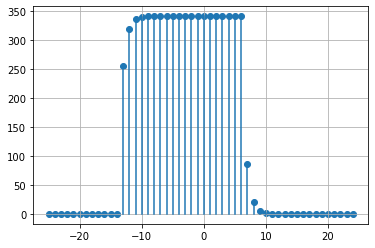

In [91]:
n = np.arange(-25, 25, step=1)
y_n = complete_convolution_first(n)
plot_dt_signal(n,y_n)

### Now we plot convolution using numpy :

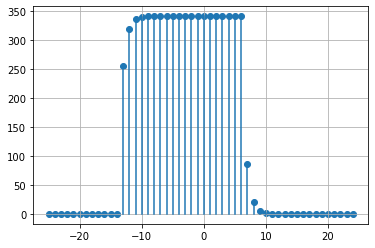

In [92]:
x_n=(np.heaviside(n-5,0)-np.heaviside(n+5,0))*((0.25)**n)
h_n=np.heaviside(n-10,0)-np.heaviside(n+10,0)
y_n=np.convolve(x_n,h_n)
plot_dt_signal(n,y_n[25:75]) # 25-75 is scaled index of np.convolve

## As we saw above the plots are the same.

# Second System :

In [93]:
def x_t_func(n):
    return 0.5*(np.heaviside(-n,0))*(np.exp(2*n))
def h_t_func(n):
    return np.heaviside(n+3,0)-np.heaviside(n-3,0)

In [108]:
def convolution_element_second(n,start,finish):
    '''
    calculates convolution for an specific t: y(t) = x(t)*h(t)
    '''
    conv_ans=0
    i=start
    while i<=finish:
        conv_ans+=x_t_func(i)*h_t_func(n-i)
        i+=0.1
    return conv_ans

In [109]:
def complete_convolution_second(n):
    '''
    calculates convolution for all n using "convolution_element_second()" function
    '''
    y=[]
    for i in n:
        y.append(convolution_element_second(i,-1*len(n),len(n)))
    return y

### First we plot convolution with our function :

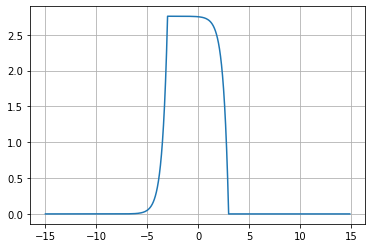

In [110]:
t=np.arange(-15,15,step=0.1)
y_t=complete_convolution_second(t)
plot_ct_signal(t,y_t)

### Now we plot convolution using numpy :

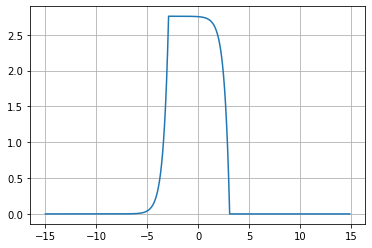

In [111]:
x_t=0.5*(np.heaviside(-t,0))*(np.exp(2*t))
h_t=np.heaviside(t+3,0)-np.heaviside(t-3,0)
y_t=np.convolve(x_t,h_t)
plot_ct_signal(t,y_t[150:450]) # 150-450 is scaled index of np.convolve

## As we saw above the plots are the same.